In [88]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [71]:
raw_data = pd.read_csv('drug200.csv')
raw_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [72]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [73]:
raw_data.shape[0]

200

In [74]:
inputs = raw_data[['Age','Sex','BP','Cholesterol','Na_to_K']].values
inputs[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [75]:
dum_sex = preprocessing.LabelEncoder()
dum_sex.fit(['F','M'])
inputs[:, 1] = dum_sex.transform(inputs[:, 1])

dum_BP = preprocessing.LabelEncoder()
dum_BP.fit(['LOW', 'NORMAL', 'HIGH'])
inputs[:, 2] = dum_BP.transform(inputs[:, 2])

dum_CHOL = preprocessing.LabelEncoder()
dum_CHOL.fit(['NORMAL','HIGH'])
inputs[:, 3] = dum_CHOL.transform(inputs[:, 3])

In [76]:
targets = raw_data['Drug']

In [77]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=69)

In [78]:
print(x_train.shape[0], y_train.shape[0])

140 140


In [79]:
print(x_test.shape[0], y_test.shape[0])

60 60


In [80]:
DrugTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [81]:
DrugTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [82]:
pred_tree = DrugTree.predict(x_test)

In [83]:
print(pred_tree)
print(y_test)

['drugA' 'drugB' 'drugY' 'drugC' 'drugX' 'drugA' 'drugY' 'drugX' 'drugA'
 'drugX' 'drugB' 'drugY' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY' 'drugY'
 'drugY' 'drugA' 'drugX' 'drugY' 'drugX' 'drugY' 'drugY' 'drugY' 'drugY'
 'drugX' 'drugA' 'drugY' 'drugY' 'drugY' 'drugX' 'drugY' 'drugA' 'drugY'
 'drugY' 'drugY' 'drugC' 'drugC' 'drugX' 'drugA' 'drugC' 'drugB' 'drugY'
 'drugC' 'drugX' 'drugY' 'drugX' 'drugY' 'drugY' 'drugC' 'drugY' 'drugX'
 'drugC' 'drugY' 'drugB' 'drugY' 'drugY' 'drugY']
156    drugA
70     drugB
178    drugY
47     drugC
86     drugX
118    drugA
125    drugY
32     drugX
100    drugA
58     drugX
31     drugB
62     drugY
170    drugX
199    drugX
23     drugY
8      drugY
13     drugY
15     drugY
68     drugY
137    drugA
81     drugX
172    drugY
159    drugX
98     drugY
153    drugX
92     drugY
141    drugY
135    drugX
101    drugA
26     drugY
59     drugY
6      drugY
139    drugX
73     drugY
36     drugA
57     drugY
21     drugY
134    drugY
1      drugC
84   

In [85]:
print("Decision Tree Accuracy : ", metrics.accuracy_score(y_test, pred_tree))

Decision Tree Accuracy :  0.9666666666666667


In [86]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

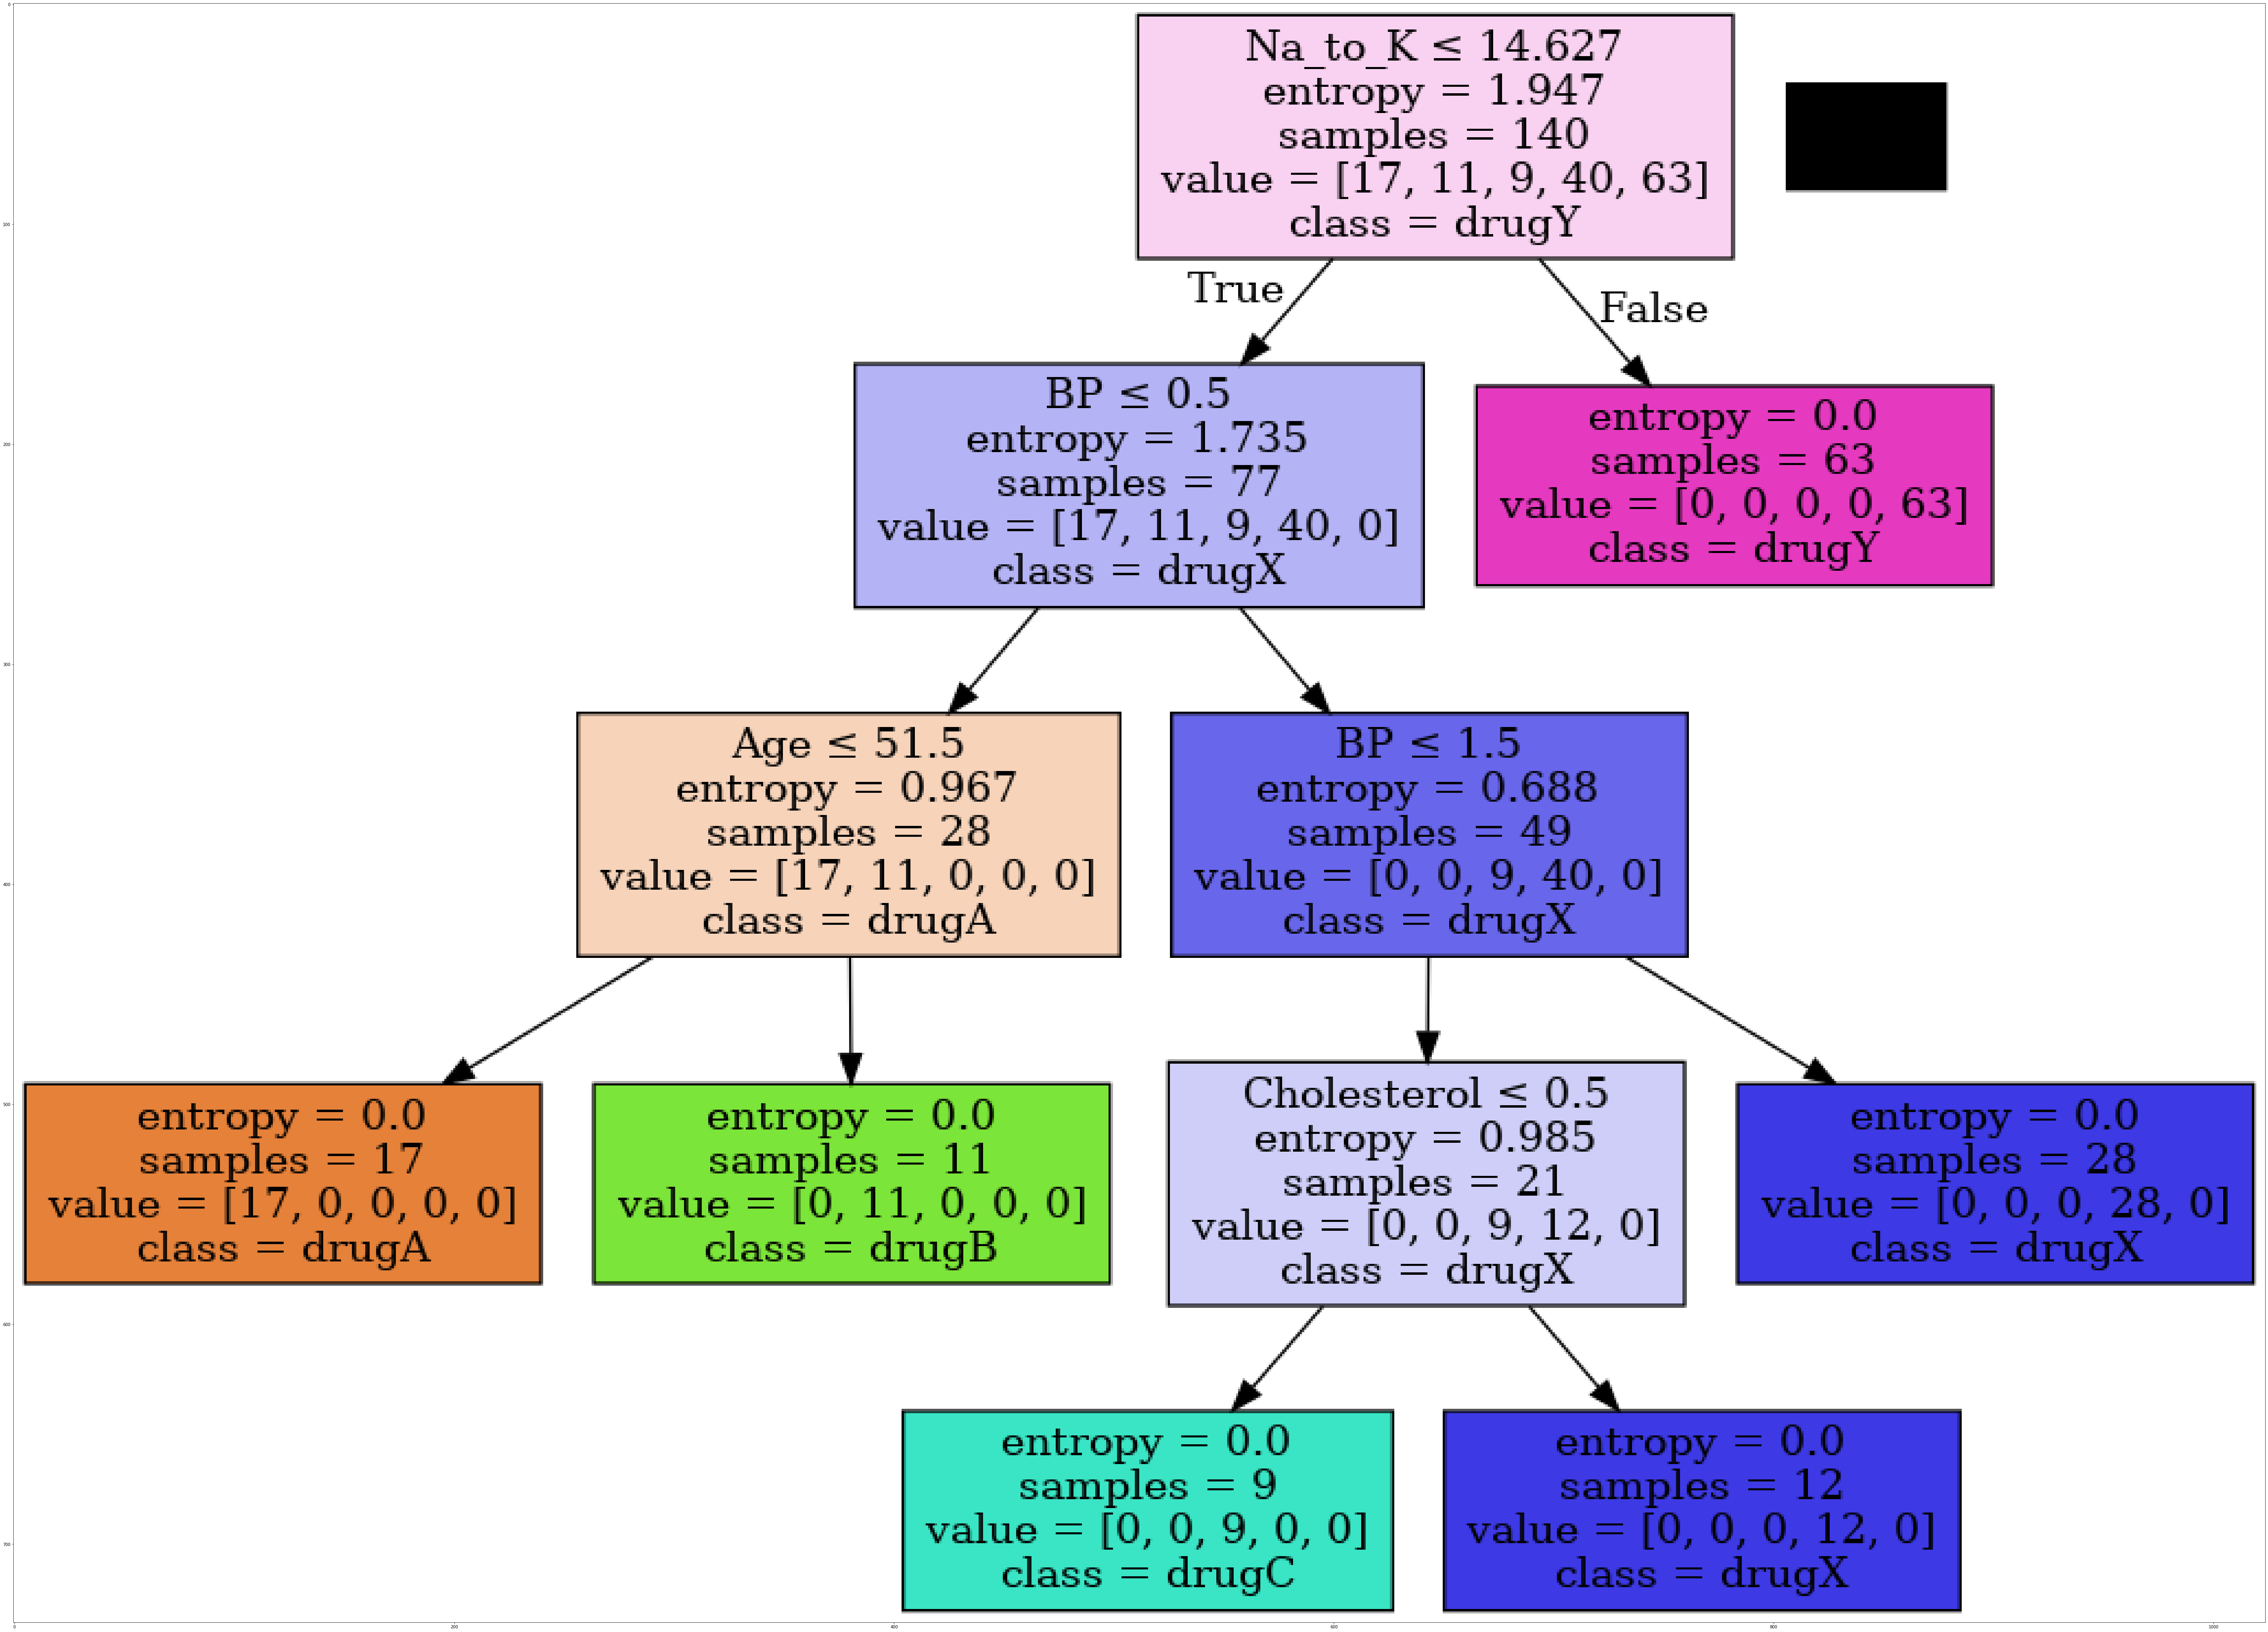

In [89]:
dot_data = StringIO()
filename = "DrugTree.png"
feature_names = raw_data.columns[0:5]
out = tree.export_graphviz(DrugTree, feature_names=feature_names, out_file=dot_data, class_names=np.unique(y_train), filled=True, special_characters=True, rotate=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100,200))
plt.imshow(img, interpolation='nearest')